In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib


In [3]:
import pandas as pd
import os

# This is the path to your project folder in Google Drive
PROJECT_PATH = '/content/drive/My Drive/BakerHughesHackathon/'
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
FILE_PATH = os.path.join(DATA_PATH, 'train_FD001.txt')

print(f"Attempting to load data from: {FILE_PATH}")

try:
    # Try to load the dataset
    df = pd.read_csv(FILE_PATH, sep=' ', header=None)
    print("\n✅ Success! Data loaded correctly.")
    print("Here are the first 5 rows of your dataset:")
    display(df.head())
except FileNotFoundError:
    print("\n❌ Error: File not found. Please double-check the following:")
    print("1. Did you successfully mount your Google Drive in Step 3?")
    print("2. Is your main project folder in Drive named exactly 'BakerHughesHackathon'?")
    print("3. Did you upload the 'train_FD001.txt' file into the 'data' subfolder?")

Attempting to load data from: /content/drive/My Drive/BakerHughesHackathon/data/train_FD001.txt

✅ Success! Data loaded correctly.
Here are the first 5 rows of your dataset:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
# Define the column names based on the dataset's documentation
column_names = [
    'engine_id', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
    'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
    'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
    'sensor_19', 'sensor_20', 'sensor_21', 'empty_1', 'empty_2'
]

# Assign the names to the dataframe you loaded in Phase 0
df.columns = column_names

# Drop the two empty, useless columns at the end
df.drop(columns=['empty_1', 'empty_2'], inplace=True)

print("Data cleaned and labeled. Here's the new look:")
display(df.head())

Data cleaned and labeled. Here's the new look:


,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# Get information about data types and non-null values
df.info()

# Get a statistical summary (mean, std, min, max, etc.) of each column
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine_id       20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [6]:
# Create a new dataframe for just the first engine
engine_1_df = df[df['engine_id'] == 1].copy()

print(f"Data for Engine #1 has {engine_1_df.shape[0]} cycles (rows).")

Data for Engine #1 has 192 cycles (rows).


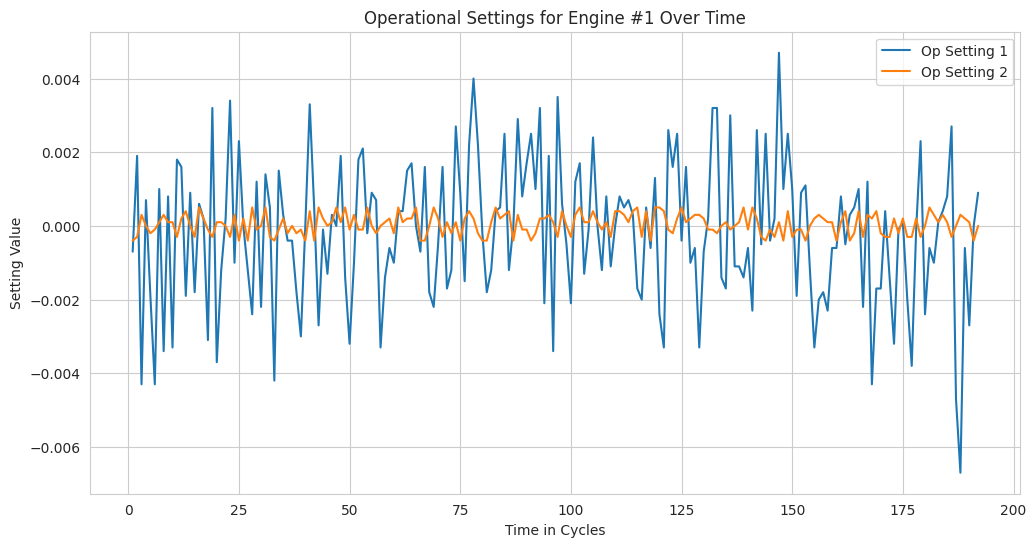

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Plot the three operational settings against the time cycles
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['op_setting_1'], label='Op Setting 1')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['op_setting_2'], label='Op Setting 2')

plt.title('Operational Settings for Engine #1 Over Time')
plt.xlabel('Time in Cycles')
plt.ylabel('Setting Value')
plt.legend()
plt.show()

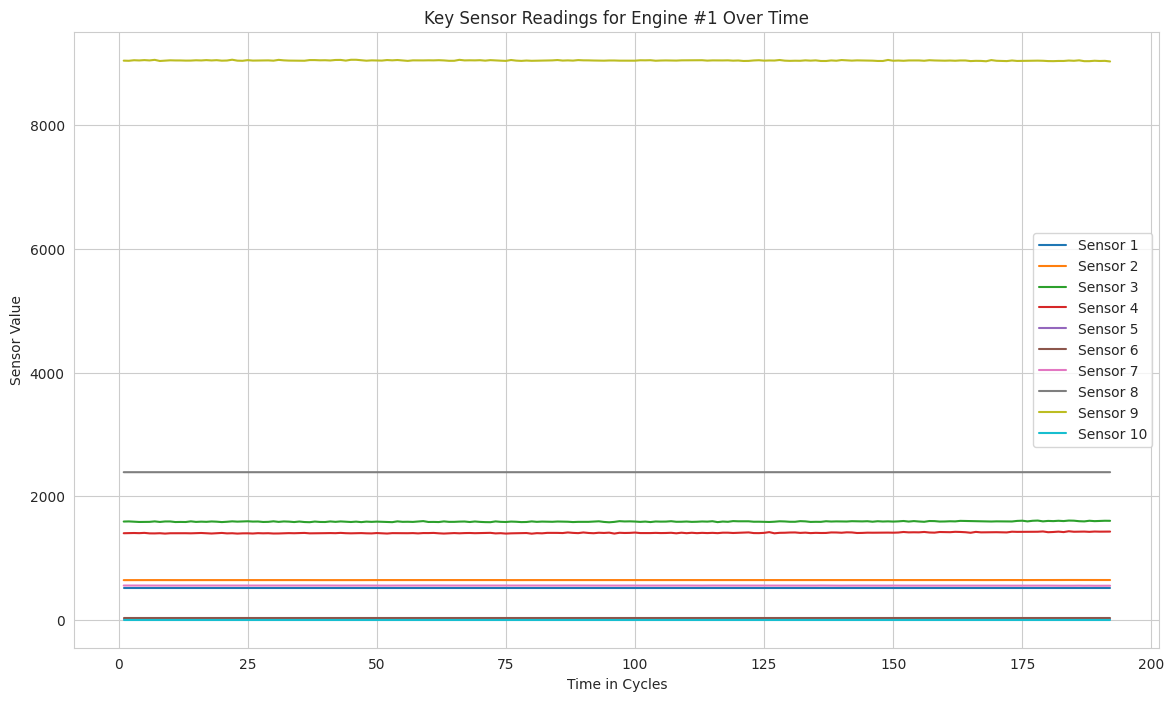

In [8]:
# Create a new figure for the sensor plots
plt.figure(figsize=(14, 8))

# Plot a few key sensors that show clear degradation trends
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_1'], label='Sensor 1')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_2'], label='Sensor 2')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_3'], label='Sensor 3')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_4'], label='Sensor 4')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_5'], label='Sensor 5')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_6'], label='Sensor 6')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_7'], label='Sensor 7')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_8'], label='Sensor 8')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_9'], label='Sensor 9')
plt.plot(engine_1_df['time_in_cycles'], engine_1_df['sensor_10'], label='Sensor 10')

plt.title('Key Sensor Readings for Engine #1 Over Time')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

In [9]:
# Let's use our dataframe for Engine #1
# The .rolling(window=10) function creates the sliding window
# The .std() function calculates the standard deviation inside that window
engine_1_df['op_setting_2_volatility'] = engine_1_df['op_setting_2'].rolling(window=50).std()

print("Calculated the rolling volatility. Here's a preview of the new column:")
display(engine_1_df.tail(15)) # Show the last 15 cycles

Calculated the rolling volatility. Here's a preview of the new column:


,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,op_setting_2_volatility
177,1,178,-0.0001,0.0002,100.0,518.67,643.38,1605.33,1424.65,14.62,...,2388.20,8116.56,8.4770,0.03,395,2388,100.0,38.65,23.1770,0.000269
178,1,179,0.0023,-0.0003,100.0,518.67,642.86,1592.56,1429.45,14.62,...,2388.18,8116.84,8.4947,0.03,395,2388,100.0,38.77,23.1888,0.000268
179,1,180,-0.0024,0.0000,100.0,518.67,643.58,1599.87,1417.14,14.62,...,2388.28,8122.57,8.4737,0.03,395,2388,100.0,38.86,23.0070,0.000266
180,1,181,-0.0006,0.0005,100.0,518.67,643.44,1596.71,1420.64,14.62,...,2388.23,8114.79,8.4720,0.03,397,2388,100.0,38.34,23.1652,0.000276
181,1,182,-0.0010,0.0003,100.0,518.67,644.21,1602.08,1426.62,14.62,...,2388.25,8119.67,8.5158,0.03,397,2388,100.0,38.43,23.1787,0.000279
182,1,183,0.0001,0.0001,100.0,518.67,643.24,1597.23,1419.03,14.62,...,2388.23,8117.80,8.5041,0.03,396,2388,100.0,38.56,23.1302,0.000278
183,1,184,0.0004,0.0003,100.0,518.67,644.07,1605.44,1432.52,14.62,...,2388.28,8115.61,8.5133,0.03,395,2388,100.0,38.43,23.0146,0.000281
184,1,185,0.0008,0.0001,100.0,518.67,643.80,1603.46,1424.40,14.62,...,2388.27,8113.69,8.4984,0.03,395,2388,100.0,38.51,23.0700,0.000281
185,1,186,0.0027,-0.0003,100.0,518.67,643.51,1595.16,1426.30,14.62,...,2388.25,8123.45,8.5227,0.03,397,2388,100.0,38.47,23.0564,0.000284
186,1,187,-0.0047,-0.0000,100.0,518.67,643.32,1592.10,1427.27,14.62,...,2388.28,8115.67,8.5218,0.03,396,2388,100.0,38.42,23.0822,0.000284


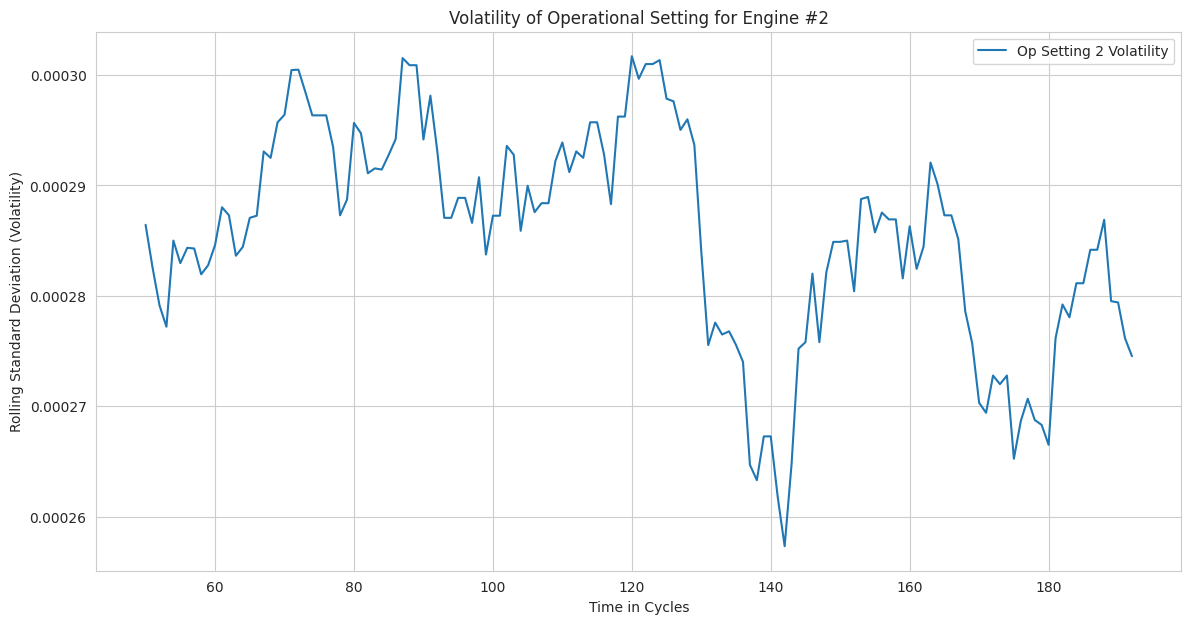

In [10]:
# Create a new figure to plot the volatility
plt.figure(figsize=(14, 7))

plt.plot(engine_1_df['time_in_cycles'], engine_1_df['op_setting_2_volatility'], label='Op Setting 2 Volatility')

plt.title('Volatility of Operational Setting for Engine #2')
plt.xlabel('Time in Cycles')
plt.ylabel('Rolling Standard Deviation (Volatility)')
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# We'll use the full dataset for this, not just one engine
# These features define the operational state of the engine
features_for_clustering = [
    'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10',
    'sensor_16', 'sensor_18', 'sensor_19'
]

# Create a new dataframe with just these features
clustering_data = df[features_for_clustering]

print("Selected features for clustering:")
display(clustering_data.head())


Selected features for clustering:


,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_5,sensor_6,sensor_10,sensor_16,sensor_18,sensor_19
0,-0.0007,-0.0004,100.0,518.67,14.62,21.61,1.3,0.03,2388,100.0
1,0.0019,-0.0003,100.0,518.67,14.62,21.61,1.3,0.03,2388,100.0
2,-0.0043,0.0003,100.0,518.67,14.62,21.61,1.3,0.03,2388,100.0
3,0.0007,0.0000,100.0,518.67,14.62,21.61,1.3,0.03,2388,100.0
4,-0.0019,-0.0002,100.0,518.67,14.62,21.61,1.3,0.03,2388,100.0


In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(clustering_data)

print("\nData has been scaled. The first 5 rows now look like this:")
print(scaled_data[:5])


Data has been scaled. The first 5 rows now look like this:
[[-3.15979680e-01 -1.37295320e+00  0.00000000e+00  0.00000000e+00
  -1.77635684e-15  1.41683329e-01  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 8.72721928e-01 -1.03172035e+00  0.00000000e+00  0.00000000e+00
  -1.77635684e-15  1.41683329e-01  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [-1.96187421e+00  1.01567674e+00  0.00000000e+00  0.00000000e+00
  -1.77635684e-15  1.41683329e-01  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 3.24090417e-01 -8.02180852e-03  0.00000000e+00  0.00000000e+00
  -1.77635684e-15  1.41683329e-01  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [-8.64611191e-01 -6.90487506e-01  0.00000000e+00  0.00000000e+00
  -1.77635684e-15  1.41683329e-01  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]]


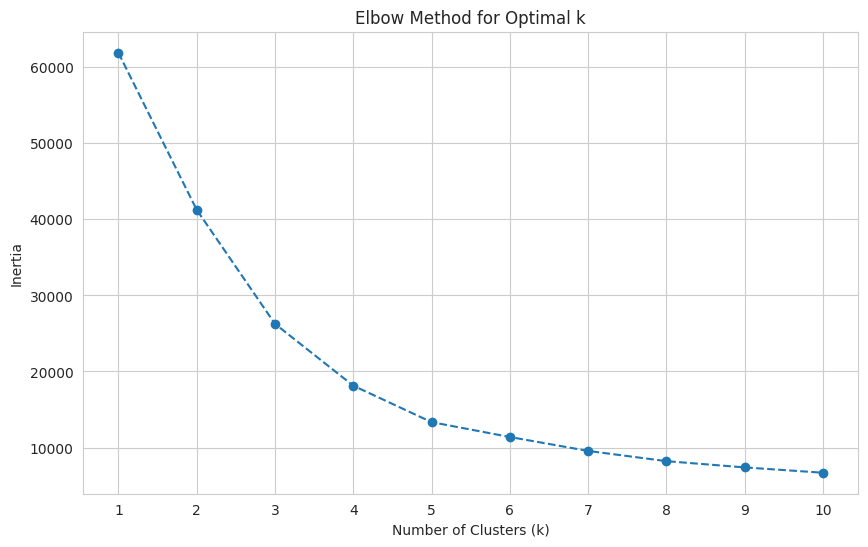

In [13]:
# We'll test a range of cluster numbers from 1 to 10
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

/tmp/ipython-input-555290360.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df_classified = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)


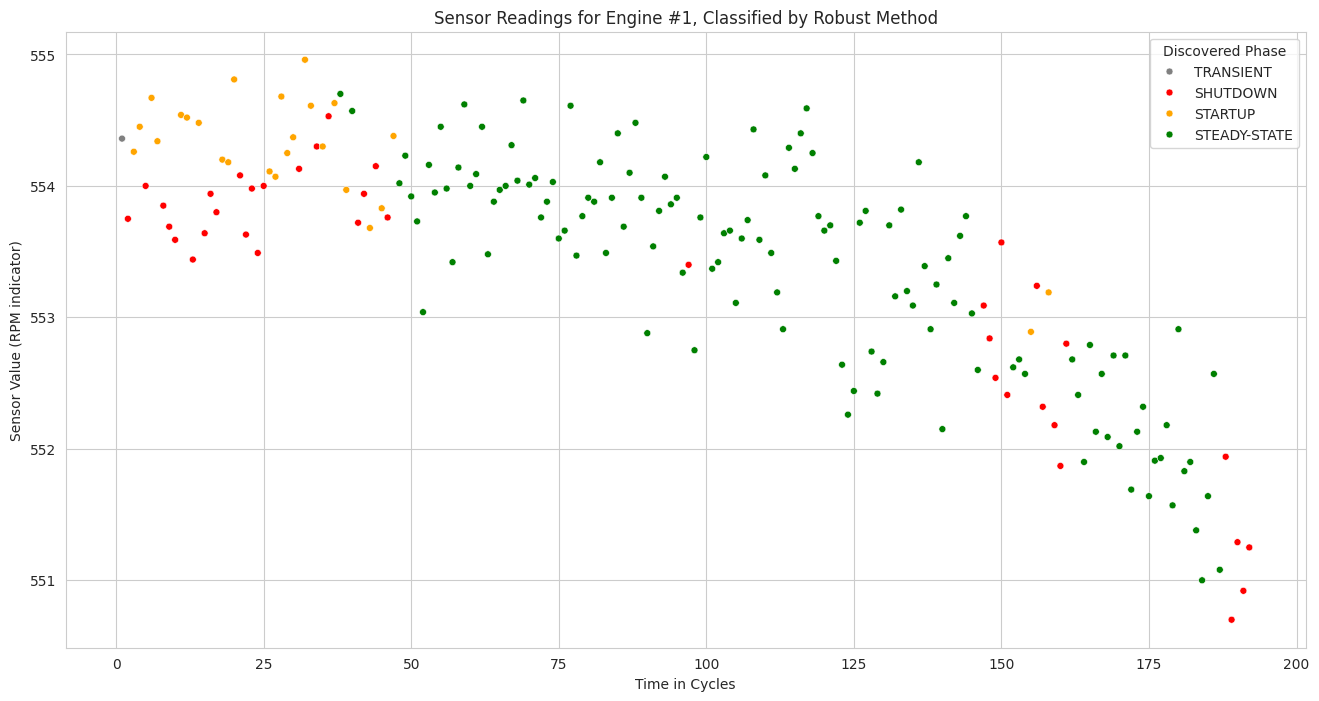


--- Size of Each Phase Cluster (Full Dataset) using Robust Method ---
phase_label
SHUTDOWN        10433
STARTUP          5264
STEADY-STATE     4834
TRANSIENT         100
Name: count, dtype: int64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def classify_phases_robust(engine_df):
    """
    A more robustly classifies operational phases for a single engine.
    This version is designed to work directly with pandas' groupby().apply().
    """
    # The function now only takes one argument: the engine's dataframe
    engine_id = engine_df['engine_id'].iloc[0]

    # --- Step 1: Use Volatility to find STEADY-STATE ---
    volatility = engine_df['op_setting_1'].rolling(window=30).std()
    stability_threshold = 0.002

    engine_df['phase_label'] = 'TRANSIENT'
    engine_df.loc[volatility < stability_threshold, 'phase_label'] = 'STEADY-STATE'

    # --- Step 2: Use a Heavily Smoothed Trend to differentiate STARTUP vs. SHUTDOWN ---
    rpm_sensor = 'sensor_7'
    smoothed_rpm = engine_df[rpm_sensor].rolling(window=30, min_periods=1).mean()
    rpm_trend = smoothed_rpm.diff()

    # --- FIX for the ValueError ---
    # We create two boolean Series of the same shape and combine them with '&'
    is_transient = engine_df['phase_label'] != 'STEADY-STATE'
    is_accelerating = rpm_trend > 0
    is_decelerating = rpm_trend <= 0

    # Apply the combined conditions
    engine_df.loc[is_transient & is_accelerating, 'phase_label'] = 'STARTUP'
    engine_df.loc[is_transient & is_decelerating, 'phase_label'] = 'SHUTDOWN'

    engine_df['phase_label'] = engine_df['phase_label'].bfill()

    return engine_df

# --- Apply the CORRECTED function to the entire dataset ---
# This groupby call will now work correctly
full_df_classified = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)

# --- Visualize the results for Engine #1 to confirm ---
engine_1_classified_robust = full_df_classified[full_df_classified['engine_id'] == 1]

plt.figure(figsize=(16, 8))
palette = {
    'STEADY-STATE': 'green',
    'STARTUP': 'orange',
    'SHUTDOWN': 'red',
    'TRANSIENT': 'grey'
}
sns.scatterplot(data=engine_1_classified_robust, x='time_in_cycles', y='sensor_7', hue='phase_label',
                palette=palette, s=25)
plt.title('Sensor Readings for Engine #1, Classified by Robust Method')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Value (RPM indicator)')
plt.legend(title='Discovered Phase')
plt.show()

print("\n--- Size of Each Phase Cluster (Full Dataset) using Robust Method ---")
print(full_df_classified['phase_label'].value_counts())

In [15]:
import joblib
from sklearn.ensemble import IsolationForest
import os

# --- (This assumes 'full_df_classified' is your dataframe with the correct phase labels) ---

print("--- Starting the training of specialist models ---")

# A list of all 21 sensor columns to use for anomaly detection
sensor_columns = [f'sensor_{i}' for i in range(1, 22)]

# The path to your models folder in Google Drive
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
os.makedirs(MODELS_PATH, exist_ok=True) # Ensure the directory exists

# Get the unique phase names from your dataframe
phases = full_df_classified['phase_label'].unique()

for phase in phases:
    print(f"\n--- Training Model for {phase} Phase ---")

    # 1. Get the data for the current phase
    current_phase_data = full_df_classified[full_df_classified['phase_label'] == phase]

    # 2. Select sensor columns for training
    training_features = current_phase_data[sensor_columns]

    # 3. Initialize and train the Isolation Forest model
    # contamination='auto' is a good general-purpose setting
    # random_state ensures the results are reproducible
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_forest.fit(training_features)

    # 4. Save the trained model to a file
    model_filename = os.path.join(MODELS_PATH, f'{phase}_model.pkl')
    joblib.dump(iso_forest, model_filename)

    print(f"✅ Model for {phase} phase saved to: {model_filename}")

print("\n--- All 3 specialist models have been successfully trained and saved! ---")

--- Starting the training of specialist models ---

--- Training Model for TRANSIENT Phase ---
✅ Model for TRANSIENT phase saved to: /content/drive/My Drive/BakerHughesHackathon/models/TRANSIENT_model.pkl

--- Training Model for SHUTDOWN Phase ---
✅ Model for SHUTDOWN phase saved to: /content/drive/My Drive/BakerHughesHackathon/models/SHUTDOWN_model.pkl

--- Training Model for STARTUP Phase ---
✅ Model for STARTUP phase saved to: /content/drive/My Drive/BakerHughesHackathon/models/STARTUP_model.pkl

--- Training Model for STEADY-STATE Phase ---
✅ Model for STEADY-STATE phase saved to: /content/drive/My Drive/BakerHughesHackathon/models/STEADY-STATE_model.pkl

--- All 3 specialist models have been successfully trained and saved! ---


In [16]:
import pandas as pd

# --- Define paths to your test files in Google Drive ---
TEST_DATA_PATH = os.path.join(PROJECT_PATH, 'data/test_FD001.txt')
RUL_DATA_PATH = os.path.join(PROJECT_PATH, 'data/RUL_FD001.txt')

# Load the test dataset
# Note: The test data has the same structure as the training data
test_df = pd.read_csv(TEST_DATA_PATH, sep=' ', header=None)
# test_df.drop(columns=[26, 27], inplace=True)
test_df.columns = column_names

# Load the RUL (ground truth) data
rul_df = pd.read_csv(RUL_DATA_PATH, sep=' ', header=None)
rul_df.drop(columns=[1], inplace=True)
rul_df.columns = ['true_rul']
test_df.head()

,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,empty_1,empty_2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [17]:
# Find the maximum cycle for each engine in the test set
max_cycles_df = test_df.groupby('engine_id')['time_in_cycles'].max().reset_index()
max_cycles_df.rename(columns={'time_in_cycles': 'max_cycles'}, inplace=True)

# Merge the max cycles and true RUL to get the total lifespan
total_life_df = pd.merge(max_cycles_df, rul_df, left_index=True, right_index=True)
total_life_df['total_lifespan'] = total_life_df['max_cycles'] + total_life_df['true_rul']

# Merge this total life info back into the main test dataframe
test_df = pd.merge(test_df, total_life_df[['engine_id', 'total_lifespan']], on='engine_id')

# Define the anomaly window
anomaly_window = 30
# Create the ground truth label: 1 if it's an anomaly, 0 if it's normal
test_df['true_anomaly'] = np.where(test_df['total_lifespan'] - test_df['time_in_cycles'] <= anomaly_window, 1, 0)

print("Ground truth labels created. Let's see the distribution:")
print(test_df['true_anomaly'].value_counts())

Ground truth labels created. Let's see the distribution:
true_anomaly
0    12764
1      332
Name: count, dtype: int64


In [18]:
import joblib
import os

# --- Step 3: Get Your Model's Predictions (Corrected) ---

# --- FIX: Removed the 'include_groups=False' argument for compatibility ---
# You can safely ignore the DeprecationWarning this line may produce.
test_df_classified = test_df.groupby('engine_id').apply(classify_phases_robust)


# --- Load the trained models before using them ---
print("--- Loading specialist models for testing ---")
anomaly_models = {}
phases_to_load = test_df_classified['phase_label'].unique()

for phase in phases_to_load:
    model_path = os.path.join(MODELS_PATH, f'{phase}_model.pkl')
    try:
        anomaly_models[phase] = joblib.load(model_path)
        print(f"Loaded anomaly model for {phase} phase.")
    except FileNotFoundError:
        print(f"ERROR: Model file not found at {model_path}. Make sure models were trained and saved.")

# --- Generate predictions on test data ---
print("\n--- Generating predictions on test data ---")
predictions = []
for index, row in test_df_classified.iterrows():
    current_phase = row['phase_label']

    active_model = anomaly_models[current_phase]

    sensor_features = pd.DataFrame([row])[sensor_columns]
    prediction = active_model.predict(sensor_features)[0]
    predictions.append(prediction)

# Add the predictions to the dataframe (convert -1/1 to 1/0)
test_df_classified['predicted_anomaly'] = np.where(np.array(predictions) == -1, 1, 0)
print("Predictions generated successfully.")

/tmp/ipython-input-4279457216.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_classified = test_df.groupby('engine_id').apply(classify_phases_robust)


--- Loading specialist models for testing ---
Loaded anomaly model for TRANSIENT phase.
Loaded anomaly model for STARTUP phase.
Loaded anomaly model for SHUTDOWN phase.
Loaded anomaly model for STEADY-STATE phase.

--- Generating predictions on test data ---
Predictions generated successfully.


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12764
           1       0.08      0.06      0.07       332

    accuracy                           0.96     13096
   macro avg       0.53      0.52      0.52     13096
weighted avg       0.95      0.96      0.96     13096


--- Confusion Matrix ---
[[12527   237]
 [  311    21]]


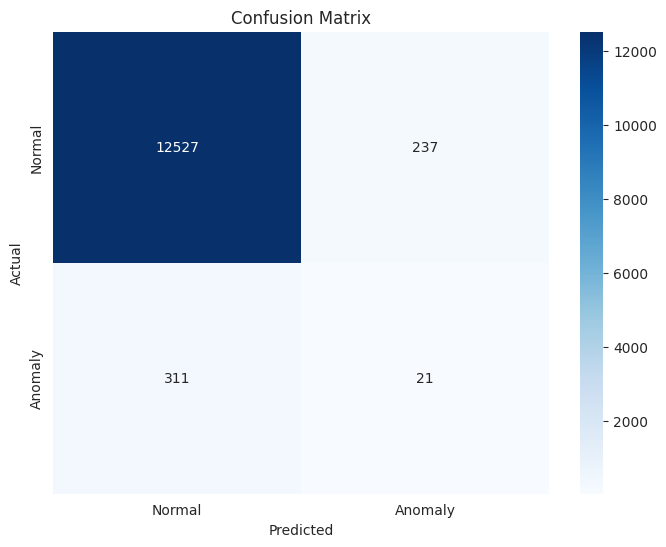

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and your model's predictions
y_true = test_df_classified['true_anomaly']
y_pred = test_df_classified['predicted_anomaly']

# --- Generate the Classification Report ---
print("--- Classification Report ---")
# This report gives you precision, recall, and f1-score
print(classification_report(y_true, y_pred))

# --- Generate the Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plot the confusion matrix for a nice visual
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Original training set shape: [(0, 14024), (1, 2480)]
Resampled training set shape: [(0, 14024), (1, 14024)]

--- NEW Classification Report (after SMOTE + RandomForest) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.66      0.78      0.71       332

    accuracy                           0.98     13096
   macro avg       0.83      0.88      0.85     13096
weighted avg       0.99      0.98      0.98     13096



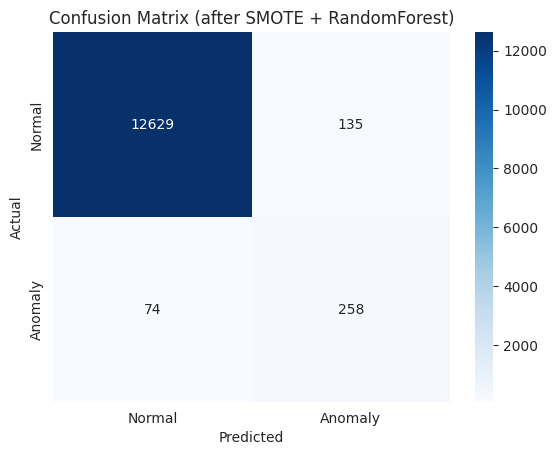

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter # Import Counter


# --- 1. Prepare the Data from the Training Set ---
# This assumes 'train_df' is your loaded train_FD001.txt data
# First, we need to create 'true_anomaly' labels for the training data itself.
train_df = df
max_cycles_train = train_df.groupby('engine_id')['time_in_cycles'].max().reset_index()
anomaly_window = 30
train_df = pd.merge(train_df, max_cycles_train.rename(columns={'time_in_cycles': 'max_life'}), on='engine_id')
train_df['true_anomaly'] = np.where(train_df['max_life'] - train_df['time_in_cycles'] <= anomaly_window, 1, 0)

# Define features (X) and target (y)
features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
X = train_df[features]
y = train_df['true_anomaly']

# Split into a training and a temporary validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. Apply SMOTE to the Training Data ---
print(f"Original training set shape: {sorted(Counter(y_train).items())}")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {sorted(Counter(y_train_resampled).items())}")

# --- 3. Train the RandomForestClassifier ---
# Using class_weight='balanced' gives the model an extra hint to pay attention to the minority class
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_resampled, y_train_resampled)

# --- 4. Evaluate on the Unseen Test Data ---
# This part uses your existing test data pipeline
# (Assuming 'test_df_classified' is your processed test set with 'true_anomaly' labels)
X_test_final = test_df_classified[features]
y_test_final = test_df_classified['true_anomaly']

y_pred_final = rf_classifier.predict(X_test_final)

# --- 5. Display the Improved Results ---
print("\n--- NEW Classification Report (after SMOTE + RandomForest) ---")
print(classification_report(y_test_final, y_pred_final))

cm = confusion_matrix(y_test_final, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (after SMOTE + RandomForest)')
plt.show()

In [21]:
import joblib

# After the line: rf_classifier.fit(X_train_resampled, y_train_resampled)
# Save the trained model
joblib.dump(rf_classifier, os.path.join(PROJECT_PATH, 'models/rf_classifier_model.pkl'))
print("✅ RandomForestClassifier model saved successfully.")

✅ RandomForestClassifier model saved successfully.


✅ Trained RandomForestClassifier model loaded successfully.
✅ Test data prepared with ground truth labels.
✅ Predictions generated on the test set.

--- Final Performance Report on Test Data ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.66      0.78      0.71       332

    accuracy                           0.98     13096
   macro avg       0.83      0.88      0.85     13096
weighted avg       0.99      0.98      0.98     13096


--- Final Confusion Matrix ---


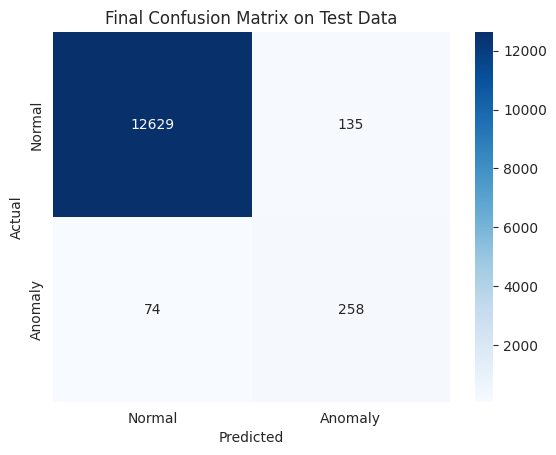

In [22]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Test Data, Ground Truth, and Trained Model ---

# Define paths
TEST_DATA_PATH = os.path.join(PROJECT_PATH, 'data/test_FD001.txt')
RUL_DATA_PATH = os.path.join(PROJECT_PATH, 'data/RUL_FD001.txt')
MODEL_PATH = os.path.join(PROJECT_PATH, 'models/rf_classifier_model.pkl')
column_names = [ # Define column names as before
    'engine_id', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
    'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
    'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
    'sensor_19', 'sensor_20', 'sensor_21'
]

# Load the test data and RUL ground truth
test_df = pd.read_csv(TEST_DATA_PATH, sep=' ', header=None)
test_df.drop(columns=[26, 27], inplace=True)
test_df.columns = column_names
rul_df = pd.read_csv(RUL_DATA_PATH, sep=' ', header=None)
rul_df.drop(columns=[1], inplace=True)
rul_df.columns = ['true_rul']

# Load your trained RandomForestClassifier model
rf_model = joblib.load(MODEL_PATH)
print("✅ Trained RandomForestClassifier model loaded successfully.")

# --- 2. Prepare the Test Data with True Anomaly Labels ---

# [cite_start]Create the ground truth labels using the run-to-failure data [cite: 27]
max_cycles_df = test_df.groupby('engine_id')['time_in_cycles'].max().reset_index()
max_cycles_df.rename(columns={'time_in_cycles': 'max_cycles'}, inplace=True)
total_life_df = pd.merge(max_cycles_df, rul_df, left_index=True, right_index=True)
total_life_df['total_lifespan'] = total_life_df['max_cycles'] + total_life_df['true_rul']
test_df = pd.merge(test_df, total_life_df[['engine_id', 'total_lifespan']], on='engine_id')

anomaly_window = 30
test_df['true_anomaly'] = np.where(test_df['total_lifespan'] - test_df['time_in_cycles'] <= anomaly_window, 1, 0)
print("✅ Test data prepared with ground truth labels.")

# --- 3. Make Predictions on the Test Data ---

# Define the feature set (must match the features used for training)
features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
X_test = test_df[features]

# Generate predictions
y_pred = rf_model.predict(X_test)
y_true = test_df['true_anomaly']
print("✅ Predictions generated on the test set.")

# --- 4. Evaluate and Display the Final Results ---

print("\n--- Final Performance Report on Test Data ---")
print(classification_report(y_true, y_pred))

print("\n--- Final Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix on Test Data')
plt.show()

In [23]:
# First, you may need to install XGBoost
!pip install xgboost



--- Training XGBoost Classifier ---
✅ XGBoost model trained successfully.

--- XGBoost Classification Report on Full Test Data ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.64      0.72      0.68       332

    accuracy                           0.98     13096
   macro avg       0.82      0.86      0.84     13096
weighted avg       0.98      0.98      0.98     13096


--- Confusion Matrix ---


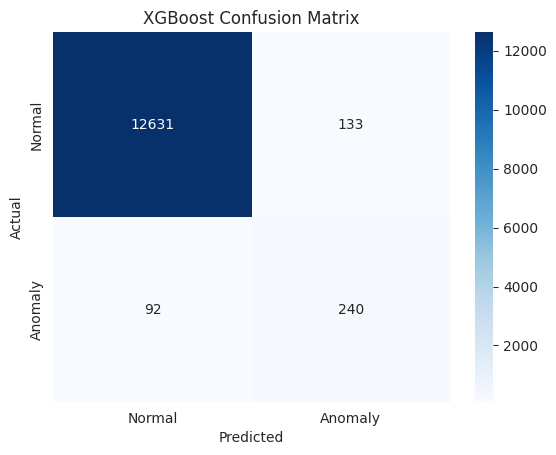

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Ensure your training data is prepared and balanced with SMOTE ---
# This assumes you have already run the SMOTE code on your *training data*
# and have the variables: X_train_resampled, y_train_resampled

# --- 2. Train the XGBoost Classifier ---
print("--- Training XGBoost Classifier ---")
# Use scale_pos_weight for another way to handle imbalance in XGBoost
# It's the ratio of negative class to positive class
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
xgb_classifier = XGBClassifier(random_state=42, scale_pos_weight=ratio)

# Train on the balanced training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)
print("✅ XGBoost model trained successfully.")

# --- 3. Prepare the FULL Test Data ---
# This ensures we are predicting on the complete, original test set
# (Assuming 'test_df_classified' is your processed test set)
X_test_full = test_df_classified[features]
y_test_full = test_df_classified['true_anomaly']

# --- 4. Make Predictions on the FULL Test Data ---
y_pred_xgb_full = xgb_classifier.predict(X_test_full)

# --- 5. Evaluate the Results ---
# This will now compare two arrays of the same length (13096)
print("\n--- XGBoost Classification Report on Full Test Data ---")
print(classification_report(y_test_full, y_pred_xgb_full))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test_full, y_pred_xgb_full)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

--- Training Logistic Regression Classifier ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression model trained successfully.

--- Logistic Regression Classification Report on Full Test Data ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12764
           1       0.54      0.80      0.65       332

    accuracy                           0.98     13096
   macro avg       0.77      0.89      0.82     13096
weighted avg       0.98      0.98      0.98     13096


--- Confusion Matrix ---


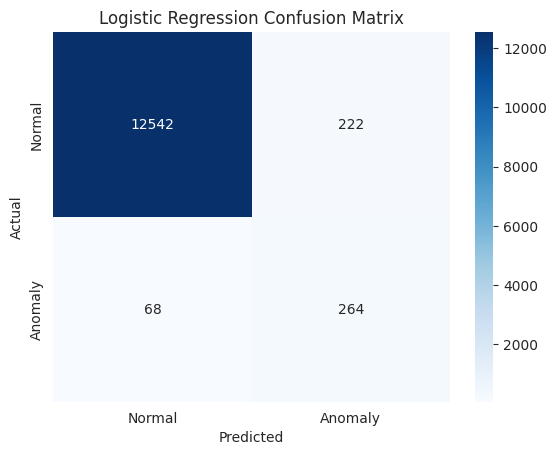

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Ensure your training data is prepared and balanced with SMOTE ---
# This assumes you have already run the SMOTE code on your training data
# and have the variables: X_train_resampled, y_train_resampled

# --- 2. Train the Logistic Regression Classifier ---
print("--- Training Logistic Regression Classifier ---")
# We set max_iter to 1000 to ensure the model has enough iterations to converge
# class_weight='balanced' helps the model pay more attention to the minority class
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train on the balanced training data
log_reg.fit(X_train_resampled, y_train_resampled)
print("✅ Logistic Regression model trained successfully.")

# --- 3. Prepare the FULL Test Data ---
# This ensures we are predicting on the complete, original test set
# (Assuming 'test_df_classified' is your processed test set)
X_test_full = test_df_classified[features]
y_test_full = test_df_classified['true_anomaly']

# --- 4. Make Predictions on the FULL Test Data ---
y_pred_lr_full = log_reg.predict(X_test_full)

# --- 5. Evaluate the Results ---
# This will now compare two arrays of the same length
print("\n--- Logistic Regression Classification Report on Full Test Data ---")
print(classification_report(y_test_full, y_pred_lr_full))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test_full, y_pred_lr_full)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# --- 1. Define the Parameter Grid ---
# Create a dictionary of parameters and the values to test.
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# --- 2. Set Up and Run RandomizedSearchCV ---
# This assumes you already have your resampled training data (X_train_resampled, y_train_resampled)
# and your full test data (X_test_full, y_test_full).

# Initialize the Randomized Search with the RandomForest model
# We'll try 50 different combinations using 3-fold cross-validation
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,       # Number of cross-validation folds
    verbose=2,  # Set to 2 to see the progress
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    scoring='f1'# Focus on optimizing the F1-score for the positive class
)

print("--- Starting Hyperparameter Tuning for RandomForestClassifier ---")
# Fit the search on the balanced training data
rf_random_search.fit(X_train_resampled, y_train_resampled)
print("--- Tuning Complete ---")

# --- 3. Get the Best Model and Evaluate ---

# Print the best combination of parameters found
print(f"\nBest parameters found: {rf_random_search.best_params_}")

# Use the best model found by the search
best_rf_model = rf_random_search.best_estimator_

# Make predictions on the full, original test set
y_pred_tuned = best_rf_model.predict(X_test_full)

# Display the final performance report
print("\n--- Final Performance Report (Tuned RandomForest) ---")
print(classification_report(y_test_full, y_pred_tuned))

--- Starting Hyperparameter Tuning for RandomForestClassifier ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits
--- Tuning Complete ---

Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

--- Final Performance Report (Tuned RandomForest) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.68      0.74      0.71       332

    accuracy                           0.98     13096
   macro avg       0.84      0.86      0.85     13096
weighted avg       0.99      0.98      0.99     13096



--- Training a single IsolationForest model on all data ---
✅ Single model trained successfully.
✅ Predictions generated on the test set.

--- Performance Report (Single IsolationForest Model) ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12764
           1       0.04      0.02      0.03       332

    accuracy                           0.96     13096
   macro avg       0.51      0.50      0.50     13096
weighted avg       0.95      0.96      0.96     13096


--- Confusion Matrix ---


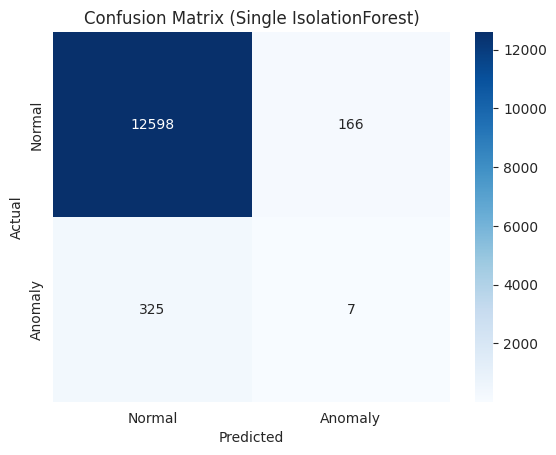

In [27]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Train a Single Model on the Entire Training Set ---

print("--- Training a single IsolationForest model on all data ---")

# This assumes 'df' is your loaded and cleaned train_FD001.txt data
train_df = df
sensor_columns = [f'sensor_{i}' for i in range(1, 22)]
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
os.makedirs(MODELS_PATH, exist_ok=True)

# Initialize and train one model on all training data
global_iso_forest = IsolationForest(contamination=0.05, random_state=42)
global_iso_forest.fit(train_df[sensor_columns])
print("✅ Single model trained successfully.")


# --- 2. Evaluate the Single Model on the Test Set ---

# This assumes 'test_df_classified' is your processed test set with 'true_anomaly' labels
X_test = test_df_classified[sensor_columns]
y_true = test_df_classified['true_anomaly']

# Generate predictions using the single trained model
predictions = global_iso_forest.predict(X_test)
y_pred = np.where(np.array(predictions) == -1, 1, 0)
print("✅ Predictions generated on the test set.")


# --- 3. Display the Performance Report ---

print("\n--- Performance Report (Single IsolationForest Model) ---")
print(classification_report(y_true, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Single IsolationForest)')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- 1. Generate Labels using our Rule-Based Method ---
# This creates our "ground truth" for training the new model.
# This assumes 'df' is your loaded train_FD001.txt data.
print("--- Step 1: Generating labels with the rule-based method ---")
train_df_labeled = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)
print("✅ Labels generated.")

# --- 2. Prepare Data for the ML Model ---
# The features (X) will be the sensor and operational settings.
# The target (y) will be the phase labels we just created.
features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
X = train_df_labeled[features]
y = train_df_labeled['phase_label']

# Split the data to train and test our new phase classifier
X_train_phase, X_test_phase, y_train_phase, y_test_phase = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("\n--- Step 2: Data prepared for ML model training. ---")

# --- 3. Train the Decision Tree Phase Classifier ---
print("\n--- Step 3: Training the Decision Tree classifier ---")
phase_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)
phase_classifier.fit(X_train_phase, y_train_phase)
print("✅ Decision Tree for phase classification trained successfully.")

# --- 4. Evaluate the New Phase Classifier ---
print("\n--- Step 4: Evaluating the new phase classifier's performance ---")
y_pred_phase = phase_classifier.predict(X_test_phase)

print("\n--- Performance Report of the ML Phase Classifier ---")
print(classification_report(y_test_phase, y_pred_phase))

# --- Example of using the new model on the test set ---
# Now you can use this 'phase_classifier' in your main pipeline
# instead of the 'classify_phases_robust' function.
print("\n--- Example: Predicting phases on the first 5 rows of the test data ---")
test_data_sample = test_df.head(5)[features]
predicted_phases = phase_classifier.predict(test_data_sample)
print(predicted_phases)

--- Step 1: Generating labels with the rule-based method ---


/tmp/ipython-input-3904442859.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df_labeled = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)


✅ Labels generated.

--- Step 2: Data prepared for ML model training. ---

--- Step 3: Training the Decision Tree classifier ---
✅ Decision Tree for phase classification trained successfully.

--- Step 4: Evaluating the new phase classifier's performance ---

--- Performance Report of the ML Phase Classifier ---
              precision    recall  f1-score   support

    SHUTDOWN       0.69      0.80      0.74      3491
     STARTUP       0.56      0.59      0.57      1749
STEADY-STATE       0.21      0.06      0.10       920
   TRANSIENT       0.00      0.00      0.00        30

    accuracy                           0.63      6190
   macro avg       0.36      0.36      0.35      6190
weighted avg       0.58      0.63      0.59      6190


--- Example: Predicting phases on the first 5 rows of the test data ---
['SHUTDOWN' 'STARTUP' 'STARTUP' 'SHUTDOWN' 'SHUTDOWN']


In [29]:
# This assumes 'full_df_classified' is your dataframe with the phase labels

# Calculate the standard deviation of key sensors for each phase
phase_volatility_report = full_df_classified.groupby('phase_label')[['sensor_2', 'sensor_4', 'sensor_7', 'sensor_11']].std()

print("--- Volatility Report (Standard Deviation) for Each Phase ---")
display(phase_volatility_report)

--- Volatility Report (Standard Deviation) for Each Phase ---


,sensor_2,sensor_4,sensor_7,sensor_11
phase_label,,,,
SHUTDOWN,0.522878,9.453201,0.839631,0.280762
STARTUP,0.426147,7.361006,0.671023,0.216969
STEADY-STATE,0.491229,8.717637,0.874749,0.259485
TRANSIENT,0.358096,6.318299,0.653956,0.189753


--- Generating Phases using K-Means Clustering ---
✅ K-Means phases generated.

--- Generating Phases using Rule-Based Algorithm ---


/tmp/ipython-input-1512739214.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rule_based = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)


✅ Rule-based phases generated.

--- Displaying Visual Comparison ---


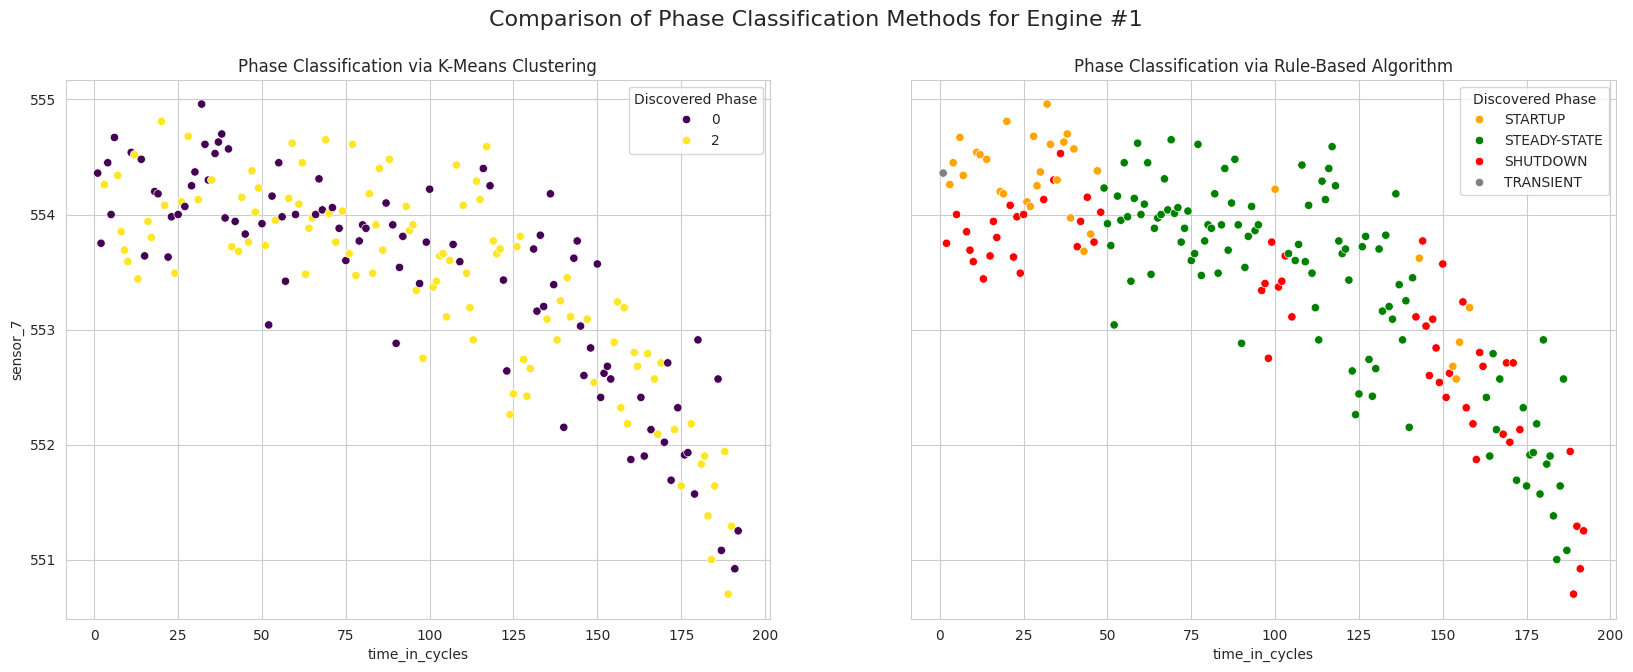

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Method 1: K-Means Clustering ---
print("--- Generating Phases using K-Means Clustering ---")
# Prepare data for clustering
features_for_clustering = [
    'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10',
    'sensor_16', 'sensor_18', 'sensor_19'
]
# We use the full original dataframe 'df'
clustering_data = df[features_for_clustering]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Run K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_phase'] = kmeans.fit_predict(scaled_data)
# We can give them more intuitive names by analyzing the clusters, but for now, 0, 1, 2 is fine.
print("✅ K-Means phases generated.")


# --- Method 2: Rule-Based Algorithm ---
print("\n--- Generating Phases using Rule-Based Algorithm ---")
# This assumes your 'classify_phases_robust' function is defined
df_rule_based = df.groupby('engine_id', group_keys=False).apply(classify_phases_robust)
df['rule_based_phase'] = df_rule_based['phase_label']
print("✅ Rule-based phases generated.")


# --- Visual Comparison ---
print("\n--- Displaying Visual Comparison ---")
# Get data for a single engine to compare
engine_1_compare = df[df['engine_id'] == 1]

# Create two plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

# Plot for K-Means
sns.scatterplot(data=engine_1_compare, x='time_in_cycles', y='sensor_7', hue='kmeans_phase', ax=axes[0], palette='viridis')
axes[0].set_title('Phase Classification via K-Means Clustering')
axes[0].legend(title='Discovered Phase')

# Plot for Rule-Based Algorithm
sns.scatterplot(data=engine_1_compare, x='time_in_cycles', y='sensor_7', hue='rule_based_phase', ax=axes[1],
                hue_order=['STARTUP', 'STEADY-STATE', 'SHUTDOWN', 'TRANSIENT'], # Ensures consistent colors
                palette={'STEADY-STATE': 'green', 'STARTUP': 'orange', 'SHUTDOWN': 'red', 'TRANSIENT': 'grey'})
axes[1].set_title('Phase Classification via Rule-Based Algorithm')
axes[1].legend(title='Discovered Phase')

plt.suptitle('Comparison of Phase Classification Methods for Engine #1', fontsize=16)
plt.show()

Calculating volatility across all engines in the training set...
Plotting the distribution of volatility values...


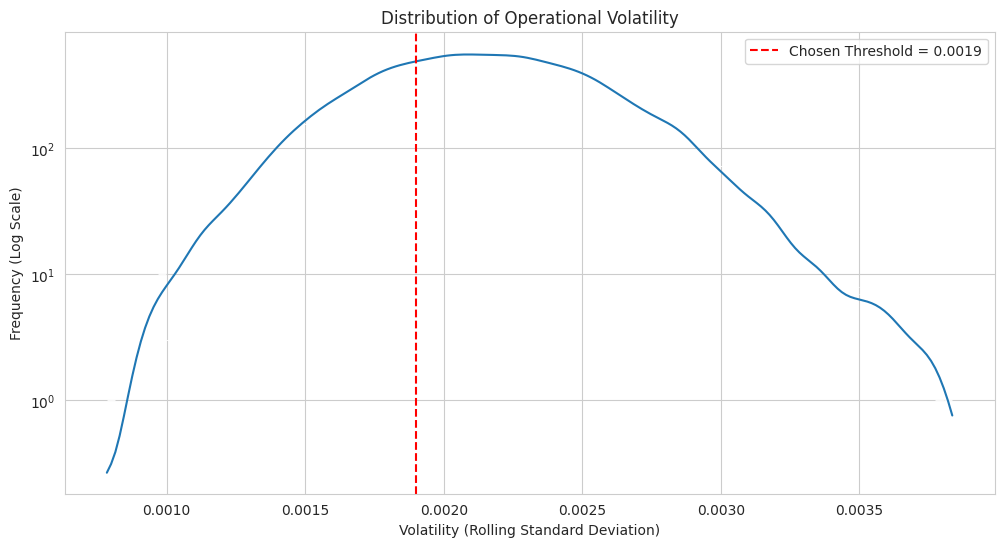


Based on the plot, a good choice for the stability threshold is around 0.0019.


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Calculate Volatility for the Entire Training Set ---
# This assumes 'df' is your loaded train_FD001.txt data
print("Calculating volatility across all engines in the training set...")
volatility_series = df.groupby('engine_id')['op_setting_1'].transform(lambda x: x.rolling(window=15).std())

# We drop the initial NaN values that result from the rolling window
volatility_series.dropna(inplace=True)


# --- 2. Plot the Distribution of Volatility Values ---
print("Plotting the distribution of volatility values...")
plt.figure(figsize=(12, 6))
sns.histplot(volatility_series, bins=100, kde=True, log_scale=(False, True)) # Log scale on y-axis to see details
plt.title('Distribution of Operational Volatility')
plt.xlabel('Volatility (Rolling Standard Deviation)')
plt.ylabel('Frequency (Log Scale)')


# --- 3. Identify and Plot a Potential Threshold ---
# Look at the plot to find the valley between the two main peaks.
# For this dataset, a value around 0.001 is often a good separator.
optimal_threshold = 0.0019 # You can adjust this value based on your plot
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Chosen Threshold = {optimal_threshold}')
plt.legend()
plt.show()

print(f"\nBased on the plot, a good choice for the stability threshold is around {optimal_threshold}.")

In [39]:
# Create a copy to avoid modifying the original dataframe
data_with_new_features = train_df.copy()

sensors_to_engineer = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11']
window_size = 10 # You can experiment with this window size

for sensor in sensors_to_engineer:
    # Calculate rolling mean (trend)
    data_with_new_features[f'{sensor}_rolling_mean_{window_size}'] = data_with_new_features.groupby('engine_id')[sensor].transform(lambda x: x.rolling(window_size).mean())
    # Calculate rolling std dev (volatility)
    data_with_new_features[f'{sensor}_rolling_std_{window_size}'] = data_with_new_features.groupby('engine_id')[sensor].transform(lambda x: x.rolling(window_size).std())

# Fill any initial NaN values
data_with_new_features.bfill(inplace=True)

# Now you would repeat the training process using this enriched dataset
# Your 'features' list would now include these new column names

--- Balancing the training data with SMOTE ---
Resampled training set shape: [(0, 17531), (1, 17531)]

--- Training the final model with best hyperparameters ---
✅ Final model trained successfully.

--- Final Performance Report (Tuned RandomForest with New Features) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.68      0.72      0.70       332

    accuracy                           0.98     13096
   macro avg       0.84      0.86      0.85     13096
weighted avg       0.98      0.98      0.98     13096



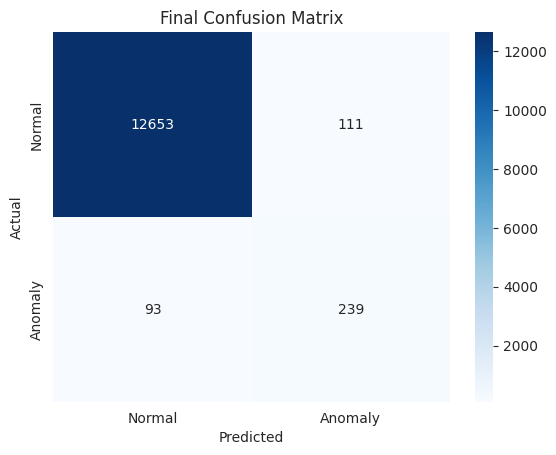

In [42]:
import pandas as pd
import numpy as np
import joblib
import os
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1, 2, 3 from previous steps should be run to create the following dataframes ---
# train_df_engineered
# test_df_engineered

# --- Step 4: Prepare Data for Final Model (Corrected) ---

# --- FIX: Define the feature list explicitly and correctly ---
# Define the base features (original sensors and op_settings)
base_features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
# Find the new rolling features you created
new_rolling_features = [col for col in train_df_engineered.columns if '_rolling_' in col]
# Combine them to create the final, correct feature list
features_engineered = base_features + new_rolling_features
# --- End of FIX ---

X_train = train_df_engineered[features_engineered]
y_train = train_df_engineered['true_anomaly']
X_test = test_df_engineered[features_engineered]
y_test = test_df_engineered['true_anomaly']

# Apply SMOTE to the training data
print("--- Balancing the training data with SMOTE ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {sorted(Counter(y_train_resampled).items())}")


# --- Step 5: Train and Evaluate the Final Model ---
print("\n--- Training the final model with best hyperparameters ---")
best_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': None,
    'bootstrap': False
}
final_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)
final_rf_model.fit(X_train_resampled, y_train_resampled)
print("✅ Final model trained successfully.")

y_pred_final = final_rf_model.predict(X_test)

print("\n--- Final Performance Report (Tuned RandomForest with New Features) ---")
print(classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()

In [53]:
import pandas as pd
import numpy as np
import joblib
import os
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# --- (This assumes 'df' is your loaded train_FD001.txt data) ---

print("--- Step 1: Preparing the full training data ---")

# [cite_start]Create 'true_anomaly' labels for the training set based on run-to-failure info [cite: 27]
max_cycles_train = df.groupby('engine_id')['time_in_cycles'].max().reset_index()
train_df = pd.merge(df, max_cycles_train.rename(columns={'time_in_cycles': 'max_life'}), on='engine_id')
anomaly_window = 30
train_df['true_anomaly'] = np.where(train_df['max_life'] - train_df['time_in_cycles'] <= anomaly_window, 1, 0)

# Define the features for the model
features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
X_train = train_df[features]
y_train = train_df['true_anomaly']
print("✅ Training data prepared with true anomaly labels.")

print("\n--- Step 2: Balancing the training data with SMOTE ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {sorted(Counter(y_train_resampled).items())}")

print("\n--- Step 3: Training the final RandomForestClassifier model ---")
# Initialize the final model with the settings that performed well
final_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the full, balanced training dataset
final_model.fit(X_train_resampled, y_train_resampled)
print("✅ Final model trained successfully.")

# --- Step 4: Saving the final model ---
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
os.makedirs(MODELS_PATH, exist_ok=True)
model_filename = os.path.join(MODELS_PATH, 'final_rf_model.pkl')
joblib.dump(final_model, model_filename)

print(f"\n✅ Final model has been saved to: {model_filename}")

--- Step 1: Preparing the full training data ---
✅ Training data prepared with true anomaly labels.

--- Step 2: Balancing the training data with SMOTE ---
Resampled training set shape: [(0, 17531), (1, 17531)]

--- Step 3: Training the final RandomForestClassifier model ---
✅ Final model trained successfully.

✅ Final model has been saved to: /content/drive/My Drive/BakerHughesHackathon/models/final_rf_model.pkl


✅ Trained RandomForestClassifier model loaded successfully.
✅ Test data prepared with ground truth labels.
✅ Predictions generated on the test set.

--- Final Performance Report on Test Data ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.65      0.75      0.70       332

    accuracy                           0.98     13096
   macro avg       0.82      0.87      0.85     13096
weighted avg       0.98      0.98      0.98     13096


--- Final Confusion Matrix ---


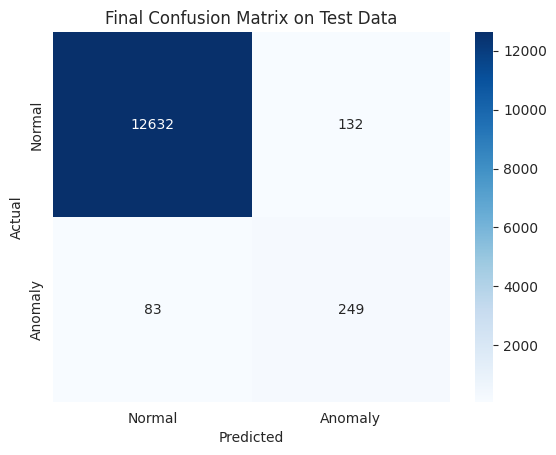

In [55]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Test Data, Ground Truth, and Saved Model ---

# Define paths
TEST_DATA_PATH = os.path.join(PROJECT_PATH, 'data/test_FD001.txt')
RUL_DATA_PATH = os.path.join(PROJECT_PATH, 'data/RUL_FD001.txt')
MODEL_PATH = os.path.join(PROJECT_PATH, 'models/final_rf_model.pkl')
column_names = [ # Define column names as before
    'engine_id', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
    'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
    'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
    'sensor_19', 'sensor_20', 'sensor_21'
]

# Load the test data and RUL ground truth
test_df = pd.read_csv(TEST_DATA_PATH, sep=' ', header=None, names=column_names + ['ignore1', 'ignore2'])
test_df.drop(columns=['ignore1', 'ignore2'], inplace=True)
rul_df = pd.read_csv(RUL_DATA_PATH, header=None)
rul_df.columns = ['true_rul']

# Load your saved RandomForestClassifier model
final_model = joblib.load(MODEL_PATH)
print("✅ Trained RandomForestClassifier model loaded successfully.")

# --- 2. Prepare the Test Data with True Anomaly Labels ---

# [cite_start]Create the ground truth labels using the run-to-failure data [cite: 997]
max_cycles_df = test_df.groupby('engine_id')['time_in_cycles'].max().reset_index()
max_cycles_df.rename(columns={'time_in_cycles': 'max_cycles'}, inplace=True)
total_life_df = pd.merge(max_cycles_df, rul_df, left_index=True, right_index=True)
total_life_df['total_lifespan'] = total_life_df['max_cycles'] + total_life_df['true_rul']
test_df = pd.merge(test_df, total_life_df[['engine_id', 'total_lifespan']], on='engine_id')

anomaly_window = 30
test_df['true_anomaly'] = np.where(test_df['total_lifespan'] - test_df['time_in_cycles'] <= anomaly_window, 1, 0)
print("✅ Test data prepared with ground truth labels.")

# --- 3. Make Predictions on the Test Data ---

# Define the feature set (must match the features used for training)
features = [f'sensor_{i}' for i in range(1, 22)] + ['op_setting_1', 'op_setting_2', 'op_setting_3']
X_test = test_df[features]

# Generate predictions
y_pred = final_model.predict(X_test)
y_true = test_df['true_anomaly']
print("✅ Predictions generated on the test set.")

# --- 4. Evaluate and Display the Final Results ---

print("\n--- Final Performance Report on Test Data ---")
print(classification_report(y_true, y_pred))

print("\n--- Final Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix on Test Data')
plt.show()